# Capstone 1: The Fight Against Malaria
### Inferrential Stats and Analysis

Primary Questions:

1) Do any of the features associated with each data point have a preliminary correlation with the PP of malaria?
    - at this point this is informational and in preparation for the next step of the analysis.
2) Does the distribution of nets and/or the pressence of insetacide resistance play a role in reducing the point prevalence of malaria?



In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
import scipy.stats as stats
from functools import reduce 
%matplotlib inline

In [3]:
# Import CSV files
df_main = pd.read_csv('data/df_main.csv')
df_nets = pd.read_csv('data/df_nets.csv')

#### Exploing features of the primary data

In [4]:
# reminder of what we are working from
df_main.head()

,Unnamed: 0,year,country_code,reported_cases,region_x,reported_deaths,rainfall,temperature,population,percent_agg,percent_urb,gdp_per_cap,country_name,pop_density,incidence
0,2,2013,IRQ,0.0,EMR,0.0,16.434735,21.970021,33883145.0,21.263124,69.262,6925.224046,Iraq,78.0,0.000000e+00
1,8,2010,TKM,0.0,EUR,0.0,11.641331,16.756224,5087210.0,72.351201,48.402,4439.203000,Turkmenistan,10.8,0.000000e+00
2,9,2011,UZB,0.0,EUR,0.0,16.376152,12.755088,29339400.0,62.599906,36.173,1564.966945,Uzbekistan,68.3,3.320000e-18
3,11,2005,TKM,1.0,EUR,0.0,13.724793,16.508073,4754641.0,74.223821,47.048,1704.514750,Turkmenistan,10.1,2.048191e-02
4,12,2013,TJK,3.0,EUR,0.0,38.393568,4.465917,8177809.0,33.938268,26.621,1040.214412,Tajikistan,58.4,2.190481e-01


Questions of interest:

1) is there a correlation between rainfall, temperature, population, and point prevalencec?

2) is there a difference between the burden of malaria in countries that received indect repellent nets and those that did not?

3) is there a difference in the burden of malaria in thos countries with reported resistance and those that do not?

4) is there a difference is the average mortality in those countries with resistance and those without?

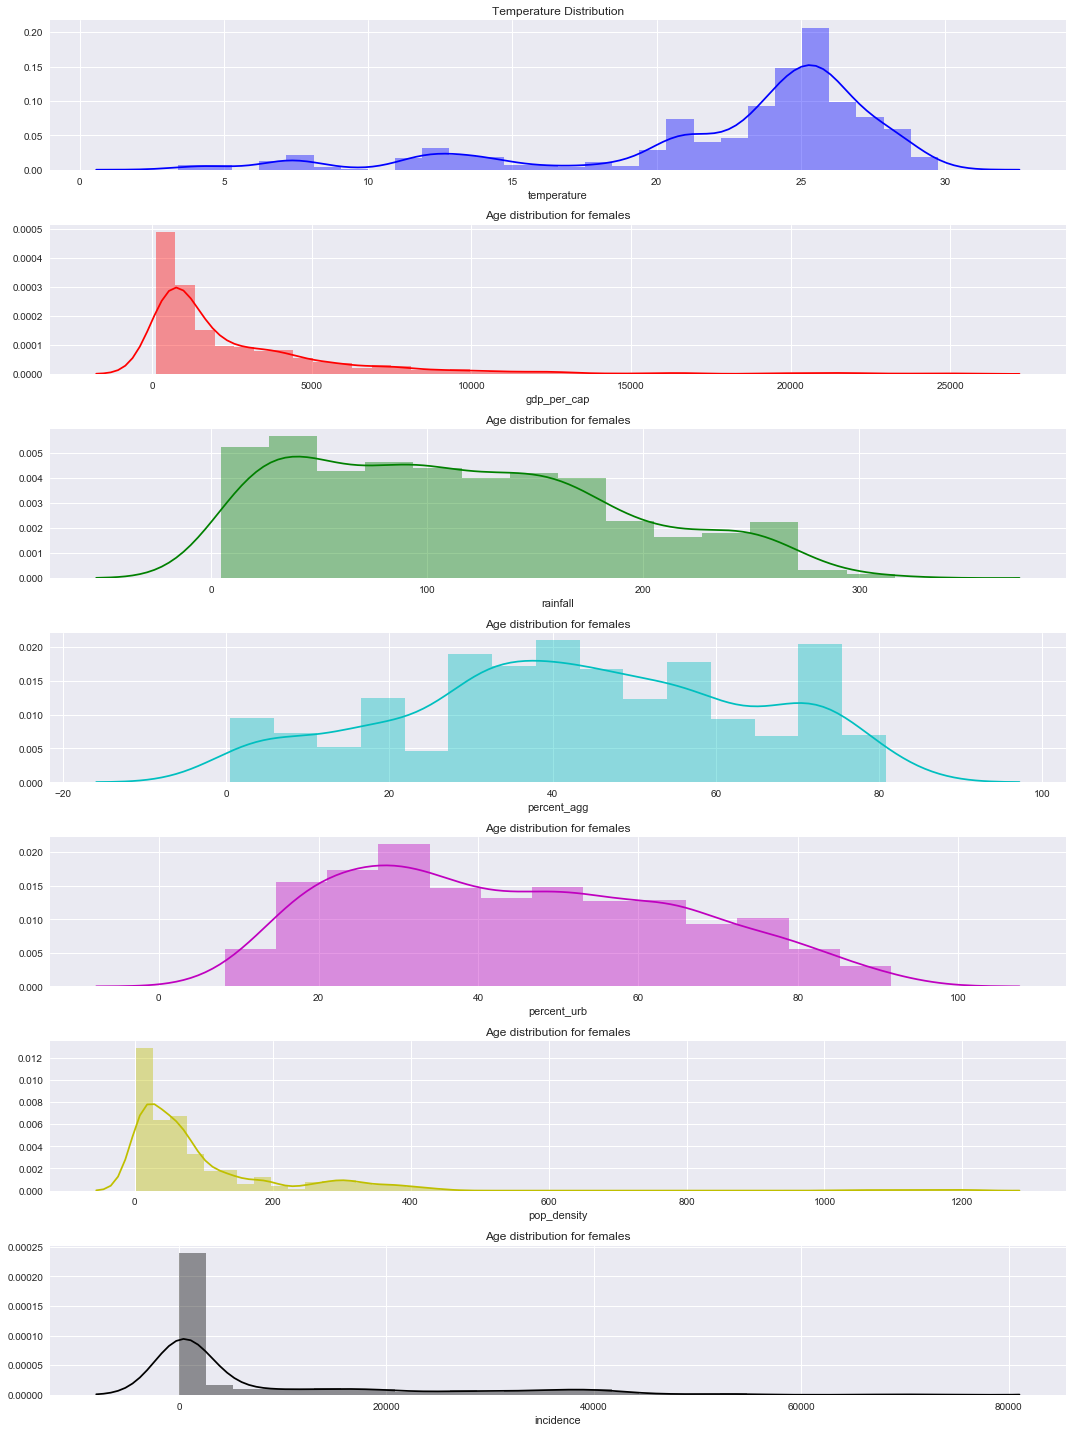

In [5]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1,figsize=(15,20))

sns.distplot(df_main['temperature'], ax=ax1, color="b")
ax1.set_title("Temperature Distribution")

sns.distplot(df_main['gdp_per_cap'], ax=ax2, color="r")
ax2.set_title("Age distribution for females")

sns.distplot(df_main['rainfall'], ax=ax3, color="g")
ax3.set_title("Age distribution for females")

sns.distplot(df_main['percent_agg'], ax=ax4, color="c")
ax4.set_title("Age distribution for females")

sns.distplot(df_main['percent_urb'], ax=ax5, color="m")
ax5.set_title("Age distribution for females")

sns.distplot(df_main['pop_density'], ax=ax6, color="y")
ax6.set_title("Age distribution for females")

sns.distplot(df_main['incidence'], ax=ax7, color="k")
ax7.set_title("Age distribution for females")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6,ax7):
    sns.despine(ax=ax)
fig.tight_layout()

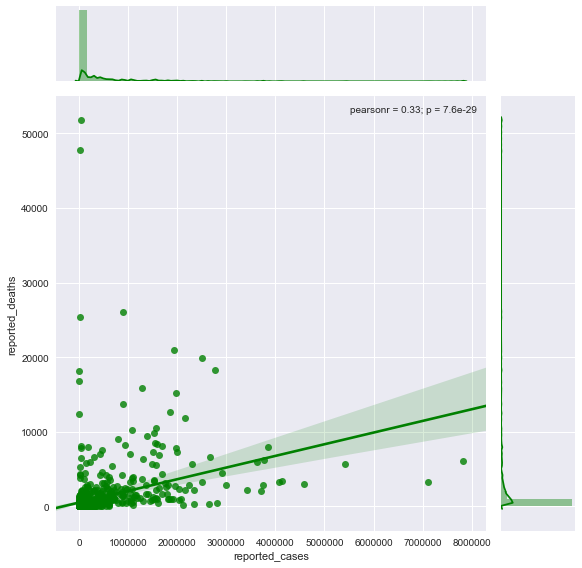

In [6]:
sns.jointplot(x="reported_cases", y="reported_deaths", data=df_main, kind='reg', color='green', size=8);

In [7]:
print(stats.pearsonr(df_main['reported_cases'], df_main['reported_deaths']))

(0.33069084530255777, 7.5866019802901644e-29)


This correlation is somewhat of a given however it is useful to see that we have many example of countries with low case numbers but very high number of deaths and vis versa. It could be highly useful to determine what factors lead to those outliers. 

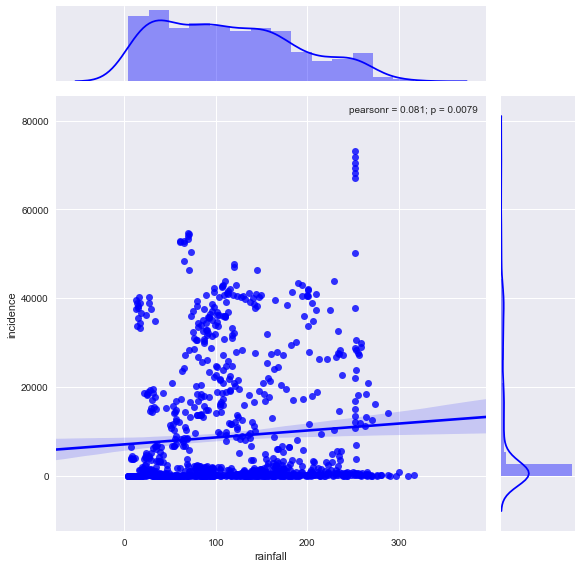

In [8]:
sns.jointplot(x="rainfall", y="incidence", data=df_main, kind='reg', color='blue', size=8);

In [9]:
print(stats.pearsonr(df_main['rainfall'], df_main['incidence']))

(0.080949825222652164, 0.0079217125053958719)


Here we can see a slightly positive correlation between rainfall and point prevalence.

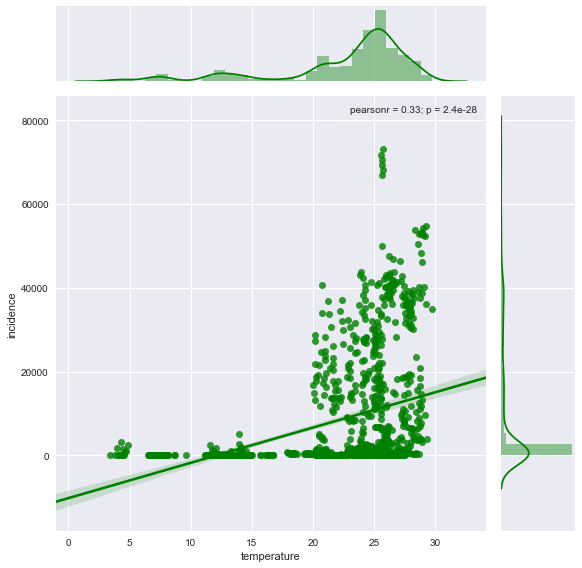

In [10]:
sns.jointplot(x="temperature", y="incidence", data=df_main, kind='reg', color='green', size=8);

Slightly positive correlation betwen temperature and PP.

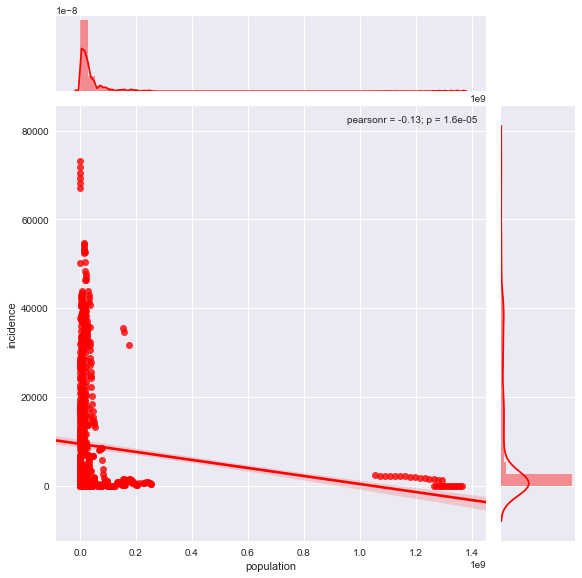

In [11]:
sns.jointplot(x="population", y="incidence", data=df_main, kind='reg', color='red', size=8);

It does not appear that there is a as much of a correlation betweeb raw population and prevalence of malaria. 

What about population density?

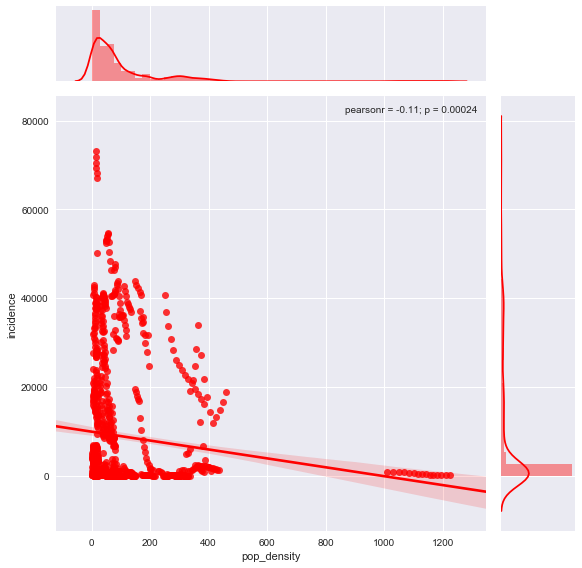

In [12]:
sns.jointplot(x="pop_density", y="incidence", data=df_main, kind='reg', color='red', size=8);

Lets take a more comprehensive look...

## OLS (preliminary look)

In [13]:
y = df_main['incidence']
X = df_main[['rainfall', 'temperature', 'percent_agg', 'percent_urb', 'gdp_per_cap', 'pop_density']]

In [14]:
 # Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\zalle\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('y ~ X', df_main).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     73.97
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           3.15e-77
Time:                        16:41:55   Log-Likelihood:                -11616.
No. Observations:                1075   AIC:                         2.325e+04
Df Residuals:                    1068   BIC:                         2.328e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -713.7972   2110.717     -0.338      0.7

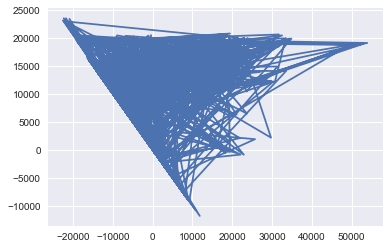

In [16]:
# fitted v. residuals
plt.plot(m.resid,m.fittedvalues);

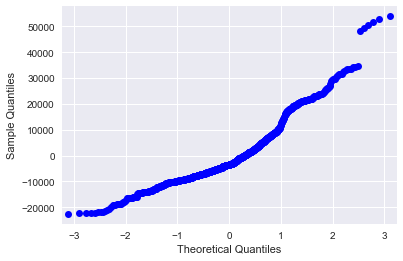

In [17]:
# Residual quantile plot
import statsmodels.api as sm
sm.qqplot(m.resid)
plt.show()

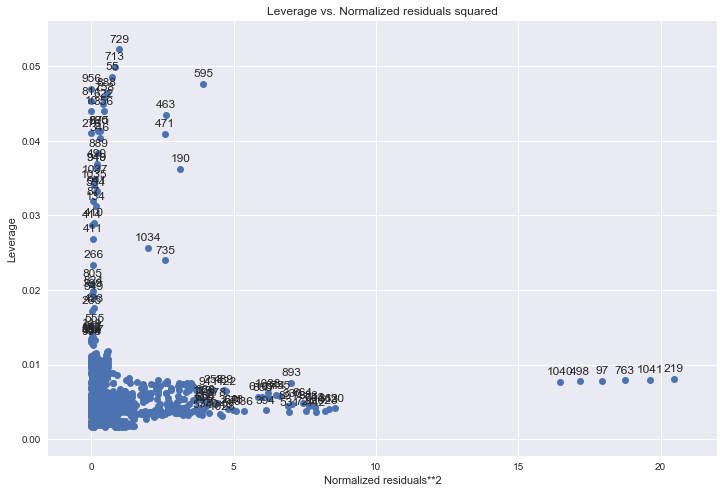

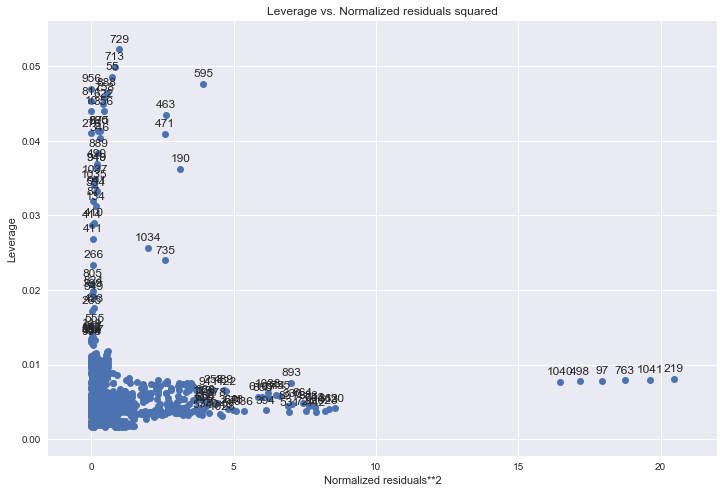

In [18]:
# leverage plot
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(figsize=(12,8))
plot_leverage_resid2(m, ax=ax)

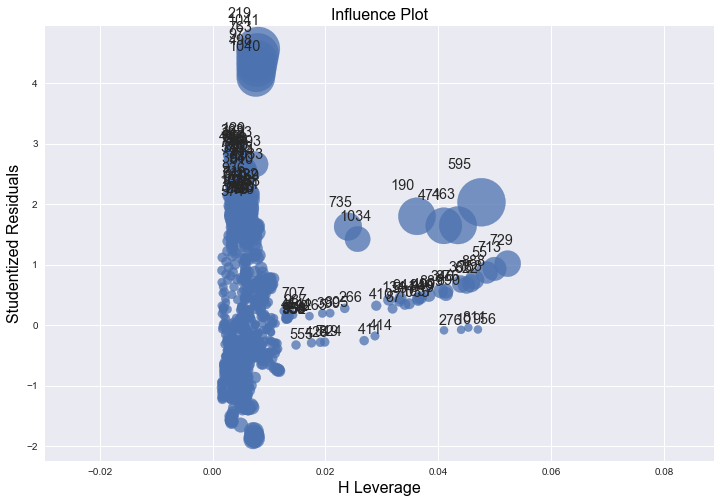

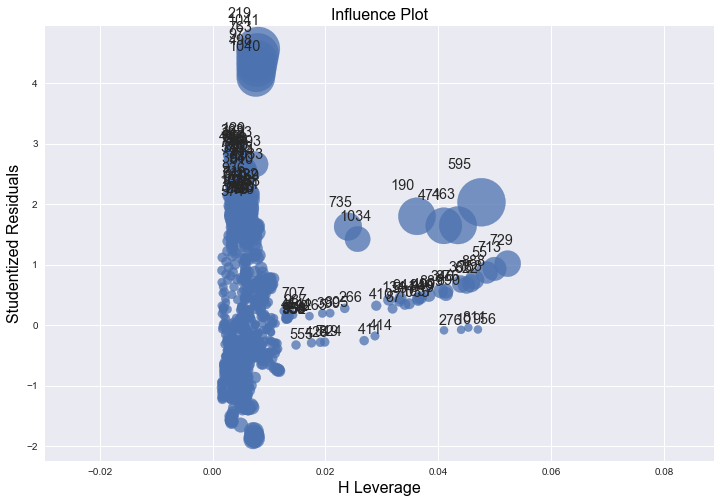

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m, ax=ax)

# Nets and Insectaside Resistance
A/B testing

In [20]:
print(df_nets.info())
df_nets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 9 columns):
Unnamed: 0           1409 non-null int64
year                 1409 non-null int64
country_code         1409 non-null object
tx_resistance        1409 non-null object
tx_resistance_int    1409 non-null float64
number_nets          1409 non-null float64
country_name_y       1409 non-null object
reported_deaths      1409 non-null float64
incidence            1409 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 99.1+ KB
None


,Unnamed: 0,year,country_code,tx_resistance,tx_resistance_int,number_nets,country_name_y,reported_deaths,incidence
0,0,2012,BGD,Yes,1.0,0.0,Bangladesh,11.0,64.634057
1,1,2012,BEN,Yes,1.0,0.0,Benin,2261.0,30769.273680
2,2,2011,GHA,Yes,1.0,1200.0,Ghana,3259.0,35107.925100
3,3,2011,GHA,Yes,1.0,300.0,Ghana,3259.0,35107.925100
4,5,2009,TGO,Yes,1.0,0.0,Togo,1556.0,40368.928270


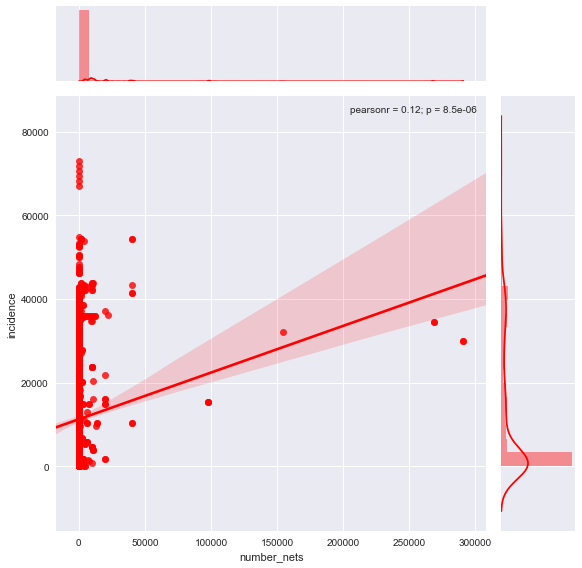

In [21]:
sns.jointplot(x="number_nets", y="incidence", data=df_nets, kind='reg', color='red', size=8);

In [22]:
net_countries = df_nets.groupby(['country_code', 'year'])[['incidence', 'number_nets']]

In [23]:
net_countries.head()

,incidence,number_nets
0,6.463406e+01,0.0
1,3.076927e+04,0.0
2,3.510793e+04,1200.0
3,3.510793e+04,300.0
4,4.036893e+04,0.0
5,3.741663e+01,0.0
6,2.266172e+03,0.0
7,1.095626e+04,4000.0
8,3.181836e+03,0.0
9,4.348933e+02,0.0


In [24]:
# sns.jointplot(x="number_nets", y="point_prevalence", data=net_countries, kind='reg', color='red', size=8);

In [25]:
nets_by_country = df_nets.groupby('country_code')[['incidence', 'number_nets']].median()

Here we are looking for a difference in the median PP in those countires with and w/o nets being distributed. Thus the actual number nets being distributed does not matter in and of itself. We are unable to accuratly further assess the utility of nets as we do not have accurat data on exactly cases and deaths in the specific areas that the nets were given out i.e. other data is a country level limiting the resolution of findings.

In [26]:
nets_by_country.head()

,incidence,number_nets
country_code,,
AFG,1070.778580,0.0
AGO,13706.668720,0.0
ARG,0.249306,0.0
AZE,0.864540,0.0
BDI,23728.628580,0.0


In [27]:
nets = nets_by_country[(nets_by_country['number_nets'] > 0)]
no_nets = nets_by_country[(nets_by_country['number_nets'] == 0)]

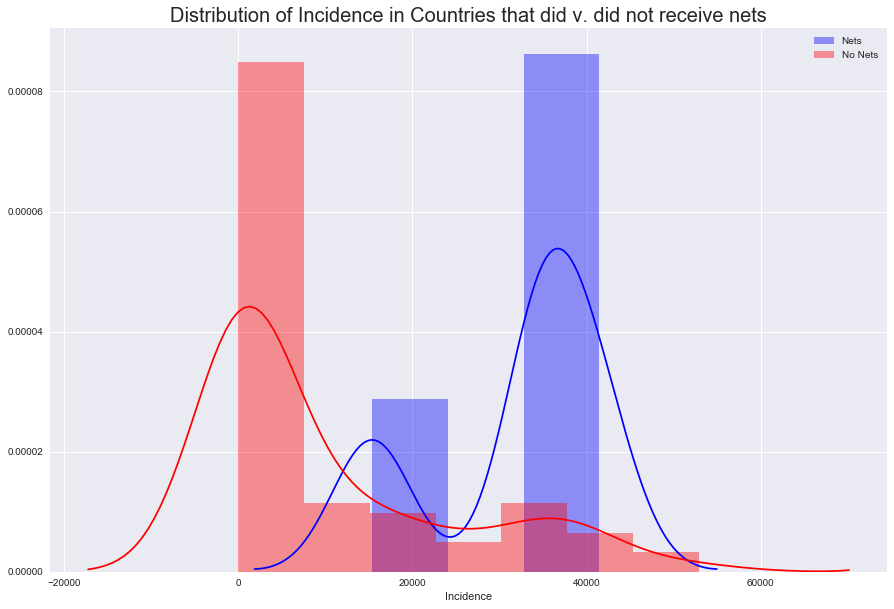

In [50]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(nets['incidence'], color="b", label='Nets')

# Plot a kernel density estimate and rug plot
sns.distplot(no_nets['incidence'], color="r", label='No Nets')
plt.title('Distribution of Incidence in Countries that did v. did not receive nets', fontsize=20)
plt.xlabel('Incidence')
plt.legend();

In [31]:

stat, p, med, tbl = stats.median_test(nets['incidence'], no_nets['incidence'])
stat, p, med, tbl

(2.4361033352473918, 0.11857044123979452, 1413.5992744999999, array([[ 4, 38],
        [ 0, 43]], dtype=int64))

In [41]:
stats.ttest_ind(nets['incidence'], no_nets['incidence'])

Ttest_indResult(statistic=2.9960178221521483, pvalue=0.0036057778036642949)

In [32]:
print('Median point prevalence countries with nets being distributed: ', nets['incidence'].median())
print('Median point prevalence for countries w/o nets being distributed: ', no_nets['incidence'].median())
print('Difference: ',  (nets['incidence'].median() - no_nets['incidence'].median()))

Median point prevalence countries with nets being distributed:  35199.75319
Median point prevalence for countries w/o nets being distributed:  1245.649739
Difference:  33954.103451


MEDIAN

## Resistance

In [76]:
#resistance_by_country = df_nets.pivot_table(index=['country_code', 'tx_resistance_int'], values=['point_prevalence'], aggfunc='median')

In [33]:
resistance_by_country = df_nets.groupby(['country_code', 'tx_resistance_int'])['incidence'].median()
resistance_by_country = resistance_by_country.reset_index()
resistance_by_country.head()

,country_code,tx_resistance_int,incidence
0,AFG,0.0,1199.264337
1,AFG,1.0,985.491750
2,AGO,0.0,13706.668720
3,AGO,1.0,14678.478425
4,ARG,0.0,0.249306


Accounting for readings from the same country for with and w/o resistance is due to there being multiple readings from the same country but at different times i.e. no resistance one year and resistance the next. This can be varriable as the population of mosquitoes shifts. 

In [34]:
resistance = resistance_by_country[resistance_by_country['tx_resistance_int'] == 1]
no_resistance = resistance_by_country[resistance_by_country['tx_resistance_int'] == 0]

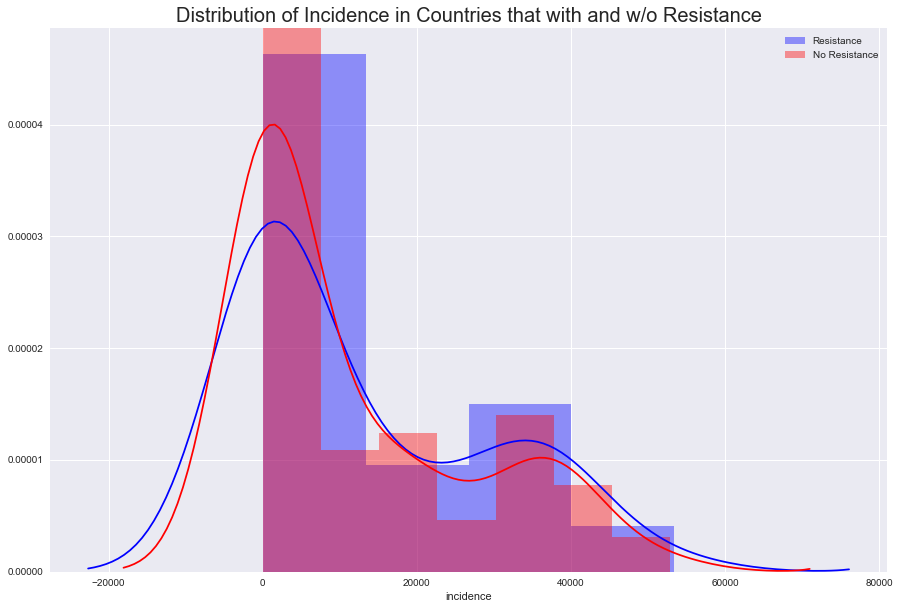

In [48]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(resistance['incidence'], color="b", label='Resistance')

# Plot a kernel density estimate and rug plot
sns.distplot(no_resistance['incidence'], color="r", label='No Resistance')
plt.title('Distribution of Incidence in Countries that with and w/o Resistance', fontsize=20)
plt.xlabel('incidence')
plt.legend();

In [36]:
stat, p, med, tbl = stats.median_test(resistance['incidence'], no_resistance['incidence'])
stat, p, med, tbl

(0.0, 1.0, 1550.2330852499999, array([[28, 42],
        [27, 43]], dtype=int64))

In [43]:
stats.ttest_ind(resistance['incidence'], no_resistance['incidence'])

Ttest_indResult(statistic=0.55397101453946895, pvalue=0.58049522472099924)

In [38]:
print('Median point prevalence countries with insectacide resistance: ', resistance['incidence'].median())
print('Median point prevalence for countries w/o insectacide resistance: ', no_resistance['incidence'].median())
print('Difference: ',  (resistance['incidence'].median() - no_resistance['incidence'].median()))

Median point prevalence countries with insectacide resistance:  1686.866896
Median point prevalence for countries w/o insectacide resistance:  1413.5992744999999
Difference:  273.26762150000013


In [37]:
resistance_with_nets = df_nets[(df_nets['tx_resistance_int'] == 1) & (df_nets['number_nets'] > 0)]
no_resistance_with_nets = df_nets[(df_nets['tx_resistance_int'] == 0) & (df_nets['number_nets'] > 0)]

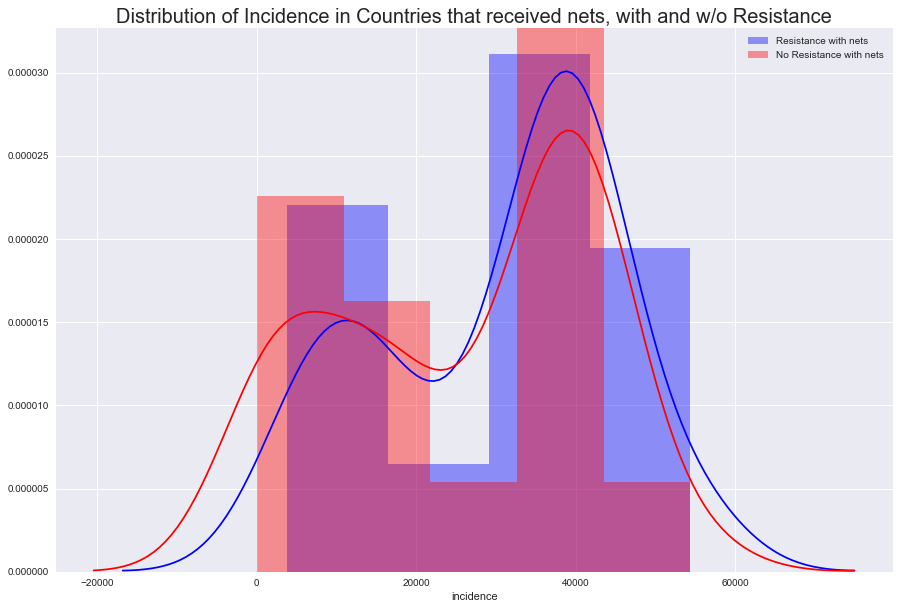

In [51]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(resistance_with_nets['incidence'], color="b", label='Resistance with nets')

# Plot a kernel density estimate and rug plot
sns.distplot(no_resistance_with_nets['incidence'], color="r", label='No Resistance with nets')
plt.title('Distribution of Incidence in Countries that received nets, with and w/o Resistance', fontsize=20)
plt.xlabel('incidence')
plt.legend();

In [40]:
stat, p, med, tbl = stats.median_test(resistance_with_nets['incidence'], no_resistance_with_nets['incidence'])
stat, p, med, tbl

(0.39669134132425848, 0.52880295195978866, 35819.00935, array([[29, 42],
        [32, 60]], dtype=int64))

In [42]:
stats.ttest_ind(resistance_with_nets['incidence'], no_resistance_with_nets['incidence'])

Ttest_indResult(statistic=1.5916413121357946, pvalue=0.11342686365141591)

In [85]:
print(stats.pearsonr(df_nets['incidence'], df_nets['number_nets']))

(0.11829920813466059, 8.4972476119804463e-06)


In [86]:
print(stats.pearsonr(df_nets['incidence'], df_nets['number_nets']))

(0.11829920813466059, 8.4972476119804463e-06)


In [87]:
print(stats.pearsonr(df_nets['incidence'], df_nets['number_nets']))

(0.11829920813466059, 8.4972476119804463e-06)


Given the statistics above it would appear that the nets are not making a very pronounced difference in the effort to curtail malaria. However, I would attribute some of this to the data itself in the form of a relativly small complete data set and a likelyhood that its not just a factor of **if** nets are being distributed but also of are they being used by those who have them. The other factor is that we are looking at only a small fraction of any of these given populations receiving nets. 